ALL MODELS DESCIRBED HERE RUN THE ENTIRE DATA PREP AND FEATURE ENGINEERING NOTEBOOKS 
ALSO RUNNING ON HOUR FREQUENCY 
BATCH SIZE 128
EPOCHS 25

sub 39 : 
        model_A = Sequential()

        model_A.add(LSTM(128, return_sequences=True, input_shape=(X_train_A.shape[1], X_train_A.shape[2])))  # returns a sequence of vectors of dimension 32
        model_A.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
        model_A.add(GRU(64, activity_regularizer="l1_l2"))
        model_A.add(Dense(64, activity_regularizer="l1_l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(32, activity_regularizer="l1_l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(16, activity_regularizer="l1_l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(1))
        model_A.build(input_shape=(1,21))
        model_A.summary()
        model_A.compile(loss='mean_absolute_error', optimizer='adam')

        local loss 39: 
                64/64 [==============================] - 1s 8ms/step
                1095.9252690802348
                77/77 [==============================] - 1s 8ms/step
                108.4554586038961
                76/76 [==============================] - 3s 10ms/step
                91.25587557006634

sub 40: 
        model_A.add(LSTM(128, return_sequences=True, input_shape=(X_train_A.shape[1], X_train_A.shape[2])))  # returns a sequence of vectors of dimension 32
        model_A.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
        model_A.add(GRU(64, activity_regularizer="l2"))
        model_A.add(Dense(64, activity_regularizer="l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(32, activity_regularizer="l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(16, activity_regularizer="l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(1))
        model_A.build(input_shape=(1,21))
        model_A.summary()
        model_A.compile(loss='mean_absolute_error', optimizer='adam')

        local loss 40: 
                64/64 [==============================] - 0s 7ms/step
                997.0125978473582
                77/77 [==============================] - 0s 5ms/step
                112.36317978896103
                76/76 [==============================] - 4s 12ms/step
                74.19562992330016

sub 41: 

        model_A.add(LSTM(128, return_sequences=True, input_shape=(X_train_A.shape[1], X_train_A.shape[2])))  # returns a sequence of vectors of dimension 32
        model_A.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
        model_A.add(GRU(64, activity_regularizer="l2"))
        model_A.add(Dense(64, activity_regularizer="l2"))
        model_A.add(Dense(32, activity_regularizer="l2"))
        model_A.add(Dense(16, activity_regularizer="l2"))
        model_A.add(Dense(1))
        model_A.build(input_shape=(1,21))
        model_A.summary()
        model_A.compile(loss='mean_absolute_error', optimizer='adam')

        local loss 41: 
                64/64 [==============================] - 3s 12ms/step
                1141.0985812133072
                77/77 [==============================] - 2s 6ms/step
                114.32893668831169
                76/76 [==============================] - 3s 11ms/step
                93.95477041873964
                










In [80]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Notebook for running RNN model

RNN models (Recurent Neural Network) have LSTM neurons that hopefully can pick up on patterns evolving over time. 

In [32]:
import tensorflow
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 


In [81]:
%store -r dm 

from sklearn.model_selection import train_test_split

dm = dm

X_A_train = dm.data_A.iloc[:, 2:-1]
y_A_train = dm.data_A.iloc[:,0]
X_B_train = dm.data_B.iloc[:, 2:-1]
y_B_train = dm.data_B.iloc[:,0]
X_C_train = dm.data_C.iloc[:, 2:-1]
y_C_train = dm.data_C.iloc[:,0]

X_train_A, X_validate_A, y_train_A, y_validate_A = train_test_split(X_A_train, y_A_train, shuffle=False, test_size=0.2)
#X_validate_A, X_test_A, y_validate_A, y_test_A = train_test_split(X_validate_A, y_validate_A, shuffle=False, test_size=0.3)

X_train_B, X_validate_B, y_train_B, y_validate_B = train_test_split(X_B_train, y_B_train, shuffle=False)
#X_validate_B, X_test_B, y_validate_B, y_test_B = train_test_split(X_validate_B, y_validate_B, shuffle=False, test_size=0.3)

X_train_C, X_validate_C, y_train_C, y_validate_C = train_test_split(X_C_train, y_C_train, shuffle=False)
#X_validate_C, X_test_C, y_validate_C, y_test_C = train_test_split(X_validate_C, y_validate_C, shuffle=False, test_size=0.3)

X_A_submission = dm.X_test_estimated_a[dm.X_test_estimated_a.columns.intersection(X_A_train.columns)]
X_B_submission = dm.X_test_estimated_b[dm.X_test_estimated_b.columns.intersection(X_B_train.columns)]
X_C_submission = dm.X_test_estimated_c[dm.X_test_estimated_c.columns.intersection(X_C_train.columns)]

# X_train_A = np.array(X_train_A).reshape((X_train_A.shape[0], 1, X_train_A.shape[1]))
# y_train_A = np.array(y_train_A)

# X_validate_A = np.array(X_validate_A).reshape((X_validate_A.shape[0], 1, X_validate_A.shape[1]))
# y_validate_A = np.array(y_validate_A)

# X_test_A = np.array(X_test_A).reshape((X_test_A.shape[0], 1, X_test_A.shape[1]))
# y_test_A = np.array(y_test_A)

# X_train_B = np.array(X_train_B).reshape((X_train_B.shape[0], 1, X_train_B.shape[1]))
# y_train_B = np.array(y_train_B)

# X_validate_B = np.array(X_validate_B).reshape((X_validate_B.shape[0], 1, X_validate_B.shape[1]))
# y_validate_B = np.array(y_validate_B)

# X_test_B = np.array(X_test_B).reshape((X_test_B.shape[0], 1, X_test_B.shape[1]))
# y_test_B = np.array(y_test_B)

# X_train_C = np.array(X_train_C).reshape((X_train_C.shape[0], 1, X_train_C.shape[1]))
# y_train_C = np.array(y_train_C)

# X_validate_C = np.array(X_validate_C).reshape((X_validate_C.shape[0], 1, X_validate_C.shape[1]))
# y_validate_C = np.array(y_validate_C)

# X_test_C = np.array(X_test_C).reshape((X_test_C.shape[0], 1, X_test_C.shape[1]))
# y_test_C = np.array(y_test_C)

# X_A_submission = np.array(X_A_submission).reshape((X_A_submission.shape[0], 1, X_A_submission.shape[1]))
# X_B_submission = np.array(X_B_submission).reshape((X_B_submission.shape[0], 1, X_B_submission.shape[1]))
# X_C_submission = np.array(X_C_submission).reshape((X_C_submission.shape[0], 1, X_C_submission.shape[1]))

print(X_train_A.shape, y_train_A.shape, X_validate_A.shape, y_validate_A.shape, X_test_A.shape, y_test_A.shape)
print(X_train_B.shape, y_train_B.shape, X_validate_B.shape, y_validate_B.shape, X_test_B.shape, y_test_B.shape)
print(X_train_C.shape, y_train_C.shape, X_validate_C.shape, y_validate_C.shape, X_test_C.shape, y_test_C.shape)


(27248, 44) (27248,) (6813, 44) (6813,) (2044, 44) (2044,)
(24614, 44) (24614,) (8205, 44) (8205,) (2462, 44) (2462,)
(19553, 44) (19553,) (6518, 44) (6518,) (1956, 44) (1956,)


In [109]:
import LSTM_class

super_model = LSTM_class.RNN_Network()

super_model.create_model()

splits_A = super_model.create_dataset_timeseries(X_train_A, y_train_A)




Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 1, 128)            88576     
                                                                 
 lstm_49 (LSTM)              (None, 1, 64)             49408     
                                                                 
 lstm_50 (LSTM)              (None, 1, 64)             33024     
                                                                 
 lstm_51 (LSTM)              (None, 1, 64)             33024     
                                                                 
 gru_44 (GRU)                (None, 1, 64)             24960     
                                                                 
 gru_45 (GRU)                (None, 1, 64)             24960     
                                                                 
 gru_46 (GRU)                (None, 64)              

In [110]:
super_model.fit_model_timeseries(super_model.model_A, splits_A, X_train_A, y_train_A, training_parameters={"epochs":50})

  0%|          | 0/50 [00:00<?, ?it/s]

40/40 [==============================] - 8s 200ms/step - loss: 0.1037 - val_loss: 0.2002


  2%|▏         | 1/50 [01:29<1:12:44, 89.07s/it]

40/40 [==============================] - 8s 202ms/step - loss: 0.0973 - val_loss: 0.2008


  4%|▍         | 2/50 [02:26<56:12, 70.25s/it]  

40/40 [==============================] - 8s 208ms/step - loss: 0.0933 - val_loss: 0.2020


  6%|▌         | 3/50 [03:23<50:33, 64.55s/it]

40/40 [==============================] - 8s 201ms/step - loss: 0.0912 - val_loss: 0.2030


  8%|▊         | 4/50 [04:21<47:25, 61.85s/it]

40/40 [==============================] - 8s 200ms/step - loss: 0.0898 - val_loss: 0.2055


 10%|█         | 5/50 [05:18<44:58, 59.97s/it]

40/40 [==============================] - 8s 200ms/step - loss: 0.0895 - val_loss: 0.2075


 12%|█▏        | 6/50 [06:15<43:19, 59.08s/it]

40/40 [==============================] - 8s 212ms/step - loss: 0.0896 - val_loss: 0.2092


 14%|█▍        | 7/50 [07:14<42:10, 58.86s/it]

40/40 [==============================] - 8s 209ms/step - loss: 0.0899 - val_loss: 0.2095


 16%|█▌        | 8/50 [08:12<41:09, 58.79s/it]

40/40 [==============================] - 8s 208ms/step - loss: 0.0899 - val_loss: 0.2096


 18%|█▊        | 9/50 [09:10<40:01, 58.58s/it]

40/40 [==============================] - 8s 205ms/step - loss: 0.0904 - val_loss: 0.2102


 20%|██        | 10/50 [10:08<38:54, 58.37s/it]

40/40 [==============================] - 8s 206ms/step - loss: 0.0900 - val_loss: 0.2092


 22%|██▏       | 11/50 [11:07<38:05, 58.60s/it]

40/40 [==============================] - 8s 207ms/step - loss: 0.0900 - val_loss: 0.2089


 24%|██▍       | 12/50 [12:04<36:49, 58.16s/it]

40/40 [==============================] - 8s 208ms/step - loss: 0.0901 - val_loss: 0.2098


 26%|██▌       | 13/50 [13:03<35:52, 58.17s/it]

40/40 [==============================] - 8s 211ms/step - loss: 0.0901 - val_loss: 0.2098


 28%|██▊       | 14/50 [14:02<35:01, 58.38s/it]

40/40 [==============================] - 8s 204ms/step - loss: 0.0904 - val_loss: 0.2102


 30%|███       | 15/50 [14:59<33:53, 58.10s/it]

40/40 [==============================] - 8s 207ms/step - loss: 0.0904 - val_loss: 0.2100


 32%|███▏      | 16/50 [15:57<32:57, 58.16s/it]

40/40 [==============================] - 8s 204ms/step - loss: 0.0905 - val_loss: 0.2106


 34%|███▍      | 17/50 [16:55<31:53, 57.97s/it]

35/40 [=========================>....] - ETA: 0s - loss: 0.1967

 34%|███▍      | 17/50 [17:01<33:03, 60.11s/it]


KeyboardInterrupt: 

In [111]:
preds = super_model.model_A.predict(np.array(X_validate_A).reshape(X_validate_A.shape[0], 1, 44))
preds = dm.scaling(preds, "A")
gt = dm.scaling(y_validate_A, "A")


213/213 [==============================] - 8s 13ms/step


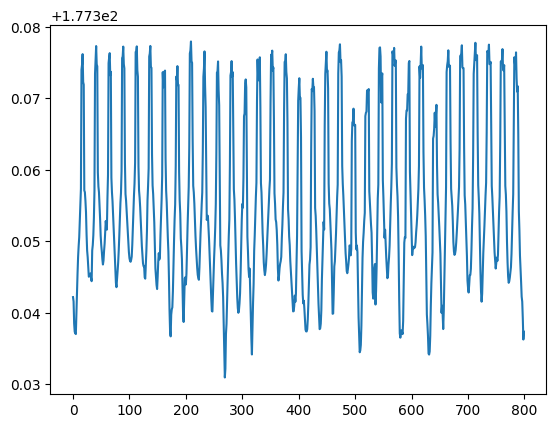

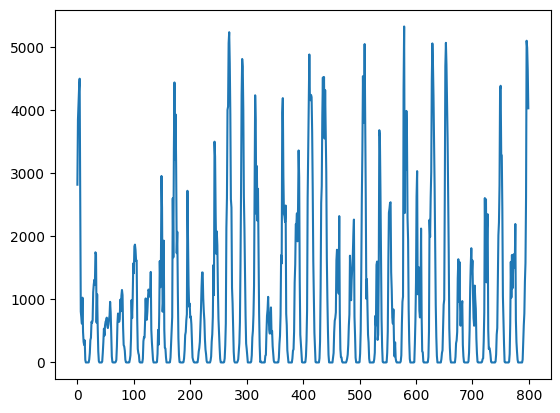

In [112]:

plt.plot(preds[0:800].reshape((800, )))

plt.show()

gt = pd.DataFrame(gt)
gt = gt.reset_index().drop("index", axis=1)

plt.plot(gt[0:800])
plt.show()


In [42]:
dm.data_A["date_forecast"]

,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,...,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,month,hours
27248,0.657738,0.187943,0.422106,0.499522,0.5,0.842075,0.220495,0.205163,0.449506,0.384382,...,0.000000,0.718469,0.60125,0.710590,0.121711,0.280612,0.497207,0.0,0.583333,0.250000
27249,0.663691,0.160461,0.576712,0.649749,0.5,0.847320,0.265042,0.250615,0.580333,0.520844,...,0.000000,0.752815,0.94900,0.751184,0.101974,0.294643,0.533520,0.0,0.583333,0.291667
27250,0.653274,0.133865,0.718826,0.781265,0.5,0.843823,0.301779,0.292571,0.693880,0.644448,...,0.000000,0.790541,0.88425,0.775416,0.115132,0.306122,0.579609,0.0,0.583333,0.333333
27251,0.635417,0.112589,0.836700,0.883578,0.5,0.836830,0.443593,0.384752,0.663968,0.686750,...,0.000000,0.817568,0.89500,0.790327,0.115132,0.389031,0.611732,0.0,0.583333,0.375000
27252,0.636905,0.099291,0.921158,0.948828,0.5,0.839161,0.559662,0.517872,0.632351,0.655598,...,0.000000,0.832770,0.99500,0.797950,0.111842,0.445153,0.565642,0.0,0.583333,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34057,0.455128,0.398148,0.033046,0.005937,0.5,0.646898,0.009401,0.053180,0.000189,0.006989,...,0.000000,0.584924,0.96700,0.340027,0.487981,0.693642,0.597107,0.0,0.333333,0.791667
34058,0.448718,0.418210,0.000888,0.000000,0.5,0.642335,0.000000,0.004776,0.000000,0.000093,...,0.000000,0.570611,0.94525,0.305873,0.437500,0.648844,0.628099,0.0,0.333333,0.833333
34059,0.448718,0.425926,0.000000,0.000000,0.5,0.642335,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.565840,0.95675,0.301605,0.418269,0.622832,0.652893,0.0,0.333333,0.875000
34060,0.448718,0.425926,0.000000,0.000000,0.5,0.642335,0.000000,0.000000,0.000000,0.000000,...,0.111111,0.558206,0.98875,0.204480,0.384615,0.599711,0.648760,0.0,0.333333,0.916667


## Defining our model 

In [13]:
from tensorflow import keras 
from keras import Sequential
from keras.layers import LSTM, Dense, GRU, SimpleRNN, Embedding, Dropout

# design network
model_A = Sequential()

model_A.add(LSTM(128, return_sequences=True, input_shape=(X_train_A.shape[1], X_train_A.shape[2])))  # returns a sequence of vectors of dimension 32
model_A.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
model_A.add(GRU(64, return_sequences=True, activity_regularizer="l2"))
model_A.add(GRU(64, activity_regularizer="l2"))
model_A.add(Dense(64, activity_regularizer="l2"))
model_A.add(Dropout(0.4))
model_A.add(Dense(32, activity_regularizer="l2"))
model_A.add(Dropout(0.4))
model_A.add(Dense(16, activity_regularizer="l2"))
model_A.add(Dropout(0.4))
model_A.add(Dense(1))
model_A.build(input_shape=(1,21))
model_A.summary()
model_A.compile(loss='mean_absolute_error', optimizer='adam')


# fit network
history = model_A.fit(X_train_A, y_train_A, epochs=25, batch_size=128, validation_data=(X_validate_A, y_validate_A), verbose=2, use_multiprocessing=True)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 128)            77312     
                                                                 
 lstm_9 (LSTM)               (None, 1, 64)             49408     
                                                                 
 gru_5 (GRU)                 (None, 1, 64)             24960     
                                                                 
 gru_6 (GRU)                 (None, 64)                24960     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)               

KeyboardInterrupt: 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 128)            77312     
                                                                 
 lstm_3 (LSTM)               (None, 1, 64)             49408     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                

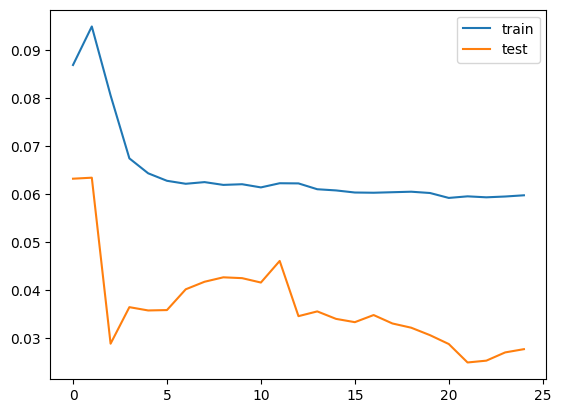

In [5]:
from tensorflow import keras 
from keras import Sequential
from keras.layers import LSTM, Dense, GRU, SimpleRNN, Embedding, Dropout

# design network
model_B = Sequential()

model_B.add(LSTM(128, return_sequences=True, input_shape=(X_train_B.shape[1], X_train_B.shape[2])))  # returns a sequence of vectors of dimension 32
model_B.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
model_B.add(GRU(64, activity_regularizer="l2"))
model_B.add(Dense(64, activity_regularizer="l2"))
model_B.add(Dropout(0.4))
model_B.add(Dense(32, activity_regularizer="l2"))
model_B.add(Dropout(0.4))
model_B.add(Dense(16, activity_regularizer="l2"))
model_B.add(Dropout(0.4))
model_B.add(Dense(1))
model_B.build(input_shape=(1,21))
model_B.summary()
model_B.compile(loss='mean_absolute_error', optimizer='adam')

# fit network
history = model_B.fit(X_train_B, y_train_B, epochs=25, batch_size=128, validation_data=(X_validate_B, y_validate_B), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 128)            77312     
                                                                 
 lstm_5 (LSTM)               (None, 1, 64)             49408     
                                                                 
 gru_2 (GRU)                 (None, 64)                24960     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

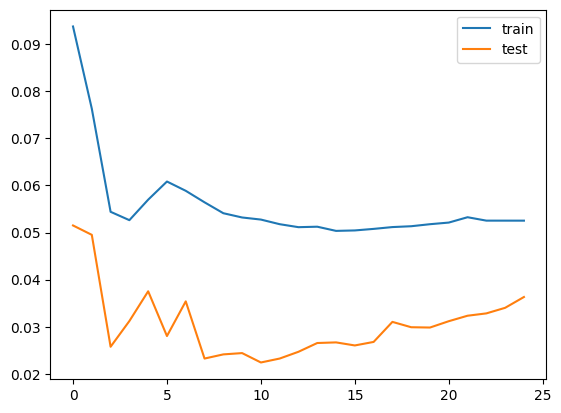

In [6]:
from tensorflow import keras 
from keras import Sequential
from keras.layers import LSTM, Dense, GRU, SimpleRNN, Embedding

# design network
model_C = Sequential()

model_C.add(LSTM(128, return_sequences=True, input_shape=(X_train_C.shape[1], X_train_C.shape[2])))  # returns a sequence of vectors of dimension 32
model_C.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
model_C.add(GRU(64, activity_regularizer="l2"))
model_C.add(Dense(64, activity_regularizer="l2"))
model_C.add(Dropout(0.4))
model_C.add(Dense(32, activity_regularizer="l2"))
model_C.add(Dropout(0.4))
model_C.add(Dense(16, activity_regularizer="l2"))
model_C.add(Dropout(0.4))
model_C.add(Dense(1))
model_C.build(input_shape=(1,21))
model_C.summary()
model_C.compile(loss='mean_absolute_error', optimizer='adam')

# fit network
history = model_C.fit(X_train_C, y_train_C, epochs=25, batch_size=128, validation_data=(X_validate_C, y_validate_C), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


## Testing our model locally

In [7]:
preds = dm.scaling(model_A.predict(X_test_A), "A")
gt = dm.scaling(y_test_A, "A") 


from keras.losses import mean_absolute_error

error = mean_absolute_error(gt, preds)
error = np.array(error) 

print(np.sum(error)/error.shape[0])

preds = dm.scaling(model_B.predict(X_test_B), "B")
gt = dm.scaling(y_test_B, "B") 


error = mean_absolute_error(gt, preds)
error = np.array(error) 

print(np.sum(error)/error.shape[0])


preds = dm.scaling(model_C.predict(X_test_C), "C")
gt = dm.scaling(y_test_C, "C") 


error = mean_absolute_error(gt, preds)
error = np.array(error) 

print(np.sum(error)/error.shape[0])



64/64 [==============================] - 3s 12ms/step
1141.0985812133072
77/77 [==============================] - 2s 6ms/step
114.32893668831169
76/76 [==============================] - 3s 11ms/step
93.95477041873964


In [8]:
## Specify the model to be used
pred_A = model_A.predict(X_A_submission)
pred_B = model_B.predict(X_B_submission)
pred_C = model_C.predict(X_C_submission)
pred_A = pd.DataFrame(pred_A.reshape((720,)))
pred_B = pd.DataFrame(pred_B.reshape((720,)))
pred_C = pd.DataFrame(pred_C.reshape((720,)))

pred_A = dm.scaling(pred_A, "A")
pred_B = dm.scaling(pred_B, "B")
pred_C = dm.scaling(pred_C, "C")

test = pd.read_csv('test.csv')

df_mid = pd.concat([pred_A, pred_B], ignore_index=True)

df = pd.concat([df_mid, pred_C], join="inner", ignore_index=True)

df[df<0] = 0

# NAME THE FILE 
df.to_csv("sub41.csv")

23/23 [==============================] - 0s 13ms/step
